<a href="https://colab.research.google.com/github/JuanPZ28/Estructura_de_datos_lineales/blob/main/TDA_Combinaci%C3%B3n_de_lista_enlazada_con_pila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Lista:
    def __init__(self):
        # Lista con capacidad 5, pero solo 4 elementos definidos
        self.data = ["A", "B", "C", "D", None]
        self.capacidad = 5
        self.tamano = 4

    def insert(self, index, element):
        if self.tamano < self.capacidad:
            # Desplazar elementos a la derecha
            for i in range(self.tamano, index, -1):
                self.data[i] = self.data[i - 1]

            # Insertar el nuevo valor
            self.data[index] = element
            self.tamano += 1  # Aumentar tamaño real
        else:
            print("La lista está llena, no se pueden insertar más elementos")

# Prueba
mi_lista = Lista()
print("Lista antes de la insercion", mi_lista.data)
print("Tamaño antes de la inserción:",mi_lista.tamano)

mi_lista.insert(2, "F")  # Insertar "F" en la posición 2

print("\nLista después de la inserción:")
for i in range(mi_lista.capacidad):  # Imprimir hasta la capacidad máxima
    print("Índice" ,i,":",mi_lista.data[i])

print("Lista final:", mi_lista.data)
print("Tamaño después de la inserción:", mi_lista.tamano)


Lista antes de la insercion ['A', 'B', 'C', 'D', None]
Tamaño antes de la inserción: 4

Lista después de la inserción:
Índice 0 : A
Índice 1 : B
Índice 2 : F
Índice 3 : C
Índice 4 : D
Lista final: ['A', 'B', 'F', 'C', 'D']
Tamaño después de la inserción: 5


In [ ]:
#Ejercicio Lista Circular
class ListaCircular:
    def __init__(self, capacidad):#Funcion para inicializar elementos con el self
      self.capacidad=capacidad
      self.data=[None]*capacidad #Asigna una capacidad fija al arreglo llenandolo con Nones
      self.tamano=0
      self.frente=0

    def insert(self, indice, valor):
      if self.tamano < self.capacidad:#Verificar si aun se pueden insertar elementos dentro de la lista circular

        pos_real = (self.frente + indice) % self.capacidad
        """Busqueda de posicion real:
      Este metodo es utilizado en listas circulares  para calcular una posicon real dentro de ella,
      debidoo a que no siempre el indice '0' sera el frente logico de la lista. El frente de esta lista
      puede estar en cualquier posicion y los elemntos se guardan de manera rotatoria. por ello el self.frente
      indica el inicio de la lista logica y el indice representa el desplazamiento que se inicia desde ese frente
      por ello se suman estos dos valores y para evitar que se salga del arreglo, ahi entra en juego el modulo '%'"""
        for i in range(self.tamano, indice, -1):
          self.data[(self.frente + i) % self.capacidad] = self.data[(self.frente + i - 1) % self.capacidad]
        self.data[pos_real] = valor
        self.tamano += 1

      else:
            # Buffer lleno: sobrescribir el elemento más antiguo
            if indice == 0:
                # Si se inserta al inicio, simplemente sobrescribe el frente actual
                self.data[self.frente] = valor
                self.frente = (self.frente + 1) % self.capacidad  # Avanzamos el frente

    def rotar(self, k=1):
      self.frente = (self.frente + k) % self.capacidad

listaCircular= ListaCircular(5)
listaCircular.insert(0, "A")
listaCircular.insert(1, "B")
listaCircular.insert(2, "C")
listaCircular.insert(3, "D")
listaCircular.insert(4, "E")
print(listaCircular.data)

listaCircular.insert(0,"F")
print(listaCircular.data)
listaCircular.insert(0,"G")
print(listaCircular.data)
listaCircular.insert(0,"H")
print(listaCircular.data)
listaCircular.insert(0,"I")
print(listaCircular.data)



['A', 'B', 'C', 'D', 'E']
['F', 'B', 'C', 'D', 'E']
['F', 'G', 'C', 'D', 'E']
['F', 'G', 'H', 'D', 'E']
['F', 'G', 'H', 'I', 'E']


In [ ]:
class Pila:
  def __init__(self):
     self.datos = []

  def push(self, valor):
     self.datos.append(valor)

  def pop(self):
      return self.datos.pop() if not self.is_empty() else None

  def is_empty(self):
      return len(self.datos) == 0

def invertir_lista(lista):
    pila = Pila()

    for elemento in lista:#inserta elementos de acuerdo a la longitud de la lista
        pila.push(elemento)


    lista_invertida = [] #Genera lista invertida donde se almacenan los nuevos datos
    while not pila.is_empty(): #Verifica que la lista no este vacia
        lista_invertida.append(pila.pop())#Con el pop saca el ultimo elemento de la lista original
        #y el append lo inserta en la lista invertida como nuevo elemento

    return lista_invertida#retorna la lista invertida

def verificar_parentesis(cadena):
    pila = Pila()
    for c in cadena:
      if c == '(':
        pila.push(c)
      elif c == ')':
        if pila.is_empty():
          return False
      pila.pop()
    return pila.is_empty()

def expresion_posfija(expresion):
    pila = Pila()
    operadores = {'+', '-', '*', '/'}

    for token in expresion.split(): #Genera un for con terminacion en la longitud de la expresion entregada
        if token.isdigit():  # Si el token es un numero
            pila.push(int(token))# Realiza un push insertando ese elemento que es un digito en la pila
        elif token in operadores:  # Si es operador, identifica que este en los operadores
            b = pila.pop()#Saca de la pila a los dos numeros o uno solo que estaban antes
            a = pila.pop()
            if token == '+':#Analiza casos de operadores
                pila.push(a + b) #devuelve el resultado a la pila
            elif token == '-':
                pila.push(a - b)#devuelve el resultado a la pila
            elif token == '*':
                pila.push(a * b)#devuelve el resultado a la pila
            elif token == '/':
                pila.push(a / b)#devuelve el resultado a la pila

    return pila.pop()# Imprime el resultado final que se generara ahi

lista=[1,2,3,4,5]
print(invertir_lista(lista))
expresion="3 4 + 5 *"
print(expresion_posfija(expresion))





[5, 4, 3, 2, 1]
35


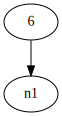

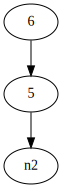

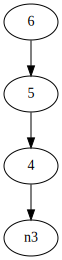

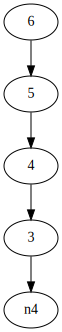

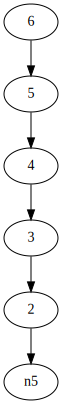

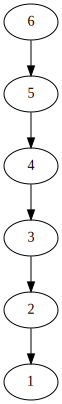

In [ ]:
#Una pila con lista enlazada
from graphviz import Digraph
class Nodo:#Clase nodo que sirve para la asignacion del valor actual y la asignacion del valor siguiente
    def __init__(self, valor):
        self.valor = valor
        self.siguiente = None

class PilaEnlazada:
    def __init__(self):
        self.cima = None#Establece un valor en la cima

    def push(self, valor):#Empieza a realizar la operacion de insercion de datos como si de una pila fuera
    # Cuando entra un nuevo valor, la cima pasa a ser el siguiente valor y el nuevo valor pasa a ser la cima
        nuevo_nodo = Nodo(valor)
        nuevo_nodo.siguiente = self.cima
        self.cima = nuevo_nodo

    def pop(self): #Desencolamiento, comprueba si primero hay algo que desencolar
        if self.is_empty():
            return None
        valor = self.cima.valor# Toma el valor que se encuentra a la cabeza y lo saca de la pila,
        #y convierte el valor abajo del sacado en la nueva cima
        self.cima = self.cima.siguiente
        return valor#retorna el valor sacado de la fila

    def is_empty(self):
        return self.cima is None

    def visualizar_pila(self):
      dot = Digraph()

      actual = self.cima
      indice = 0

      while actual is not None:
        dot.node(f'n{indice}', str(actual.valor))
        if actual.siguiente is not None:
            dot.edge(f'n{indice}', f'n{indice+1}')
        actual = actual.siguiente
        indice += 1
        display(dot)

Pila=PilaEnlazada()
Pila.push(1)
Pila.push(2)
Pila.push(3)
Pila.push(4)
Pila.push(5)
Pila.push(6)
Pila.visualizar_pila()
